In [ ]:
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.animation as animation
import xarray as xr
import plotly.express as px
from datetime import datetime
import os
!pip install georasters --q


     |████████████████████████████████| 6.3 MB 6.7 MB/s 
     |████████████████████████████████| 1.0 MB 42.7 MB/s 
     |████████████████████████████████| 210 kB 74.2 MB/s 
     |████████████████████████████████| 16.7 MB 44.9 MB/s 
     |████████████████████████████████| 147 kB 59.6 MB/s 
     |████████████████████████████████| 2.4 MB 42.2 MB/s 
     |████████████████████████████████| 243 kB 62.0 MB/s 
     |████████████████████████████████| 41 kB 509 kB/s 
     |████████████████████████████████| 5.7 MB 33.4 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 220 kB 49.1 MB/s 
     |████████████████████████████████| 116 kB 30.6 MB/s 
     |████████████████████████████████| 46 kB 3.1 MB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 60 kB 5.9 MB/s 
     |████████████████████████████████| 179 kB 47.4 MB/s 
     |████████████████████████████████| 2.1 MB 49.3 MB/s 
     |██████████████████

In [ ]:
# data0 =  netCDF4.Dataset('/content/drive/MyDrive/Climate Data/Data/oco2_GEOS_L3CO2_month_201708_B10206Ar.nc4')
data0 = netCDF4.Dataset('/content/drive/MyDrive/Climate Data/Data/oco2_GEOS_L3CO2_month_201503_B10206Ar.nc4')
# data2 = netCDF4.Dataset('/content/drive/MyDrive/Climate Data/Data/oco2_GEOS_L3CO2_month_201504_B10206Ar.nc4')


In [ ]:
# df0 = xr.open_dataset('/content/drive/MyDrive/Climate Data/Data/oco2_GEOS_L3CO2_month_201708_B10206Ar.nc4')
# df0 = xr.open_dataset('/content/drive/MyDrive/Climate Data/Data/oco2_GEOS_L3CO2_month_201503_B10206Ar.nc4')
# df3 = xr.open_dataset('/content/drive/MyDrive/Climate Data/Data/oco2_GEOS_L3CO2_month_201504_B10206Ar.nc4')

# df0.keys()


In [ ]:
print(data0.RangeBeginningDate)
print(data0.RangeEndingDate)

2015-03-01
2015-03-01


In [ ]:
data0.RangeBeginningTime
# data1.RangeBeginningTime
# data2.RangeBeginningTime

data0.RangeEndingTime
# data1.RangeEndingTime
# data2.RangeEndingTime




data0.variables['time'][0]
# data2.variables['time'][0]



masked_array(data=15.,
             mask=False,
       fill_value=1e+20)

# Creating the dataframe

In [ ]:
latitude_values = list(data0.variables['lat'][:])
longitude_values = list(data0.variables['lon'][:])

XCO2_values = list(data0.variables['XCO2'][:])[0]
try:
    XCO2PREC_values = list(data0.variables['XCO2PREC'][:])[0]
except:
    XCO2PREC_values = np.NaN

latitude_values_for_df = np.repeat(latitude_values,len(longitude_values))
longitude_values_for_df =  np.array(longitude_values * len(latitude_values))

XCO2_values_for_df = XCO2_values.flatten()
try:
    XCO2PREC_values_for_df = XCO2PREC_values.flatten()
except:
    XCO2PREC_values_for_df = np.NaN
format = '%Y-%m-%d'
month_year = datetime.strptime(data0.RangeBeginningDate , format)

In [ ]:
XCO2_df = pd.DataFrame({'lat' : latitude_values_for_df, 
                        'lon' : longitude_values_for_df, 
                        'XCO2' : XCO2_values_for_df,  
                        'XCO2PREC' : XCO2PREC_values_for_df,
                       'Month' : month_year.month,
                       'Year': month_year.year})

XCO2_df['DATE'] = pd.to_datetime(XCO2_df[['Year', 'Month']].assign(DAY=1))

XCO2_df = XCO2_df[(XCO2_df['lat'] >= -5) & (XCO2_df['lat'] <= 5)]
XCO2_df = XCO2_df[(XCO2_df['lon'] >= 33.5) & (XCO2_df['lon'] <= 42 )].reset_index(drop=True)


In [ ]:
XCO2_df['lat'].unique()
XCO2_df['lat'].apply(lambda x: round(x,2)).unique()



array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5, -0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

# POWER Plant Details

In [ ]:
power_plant_df = pd.read_csv('/content/drive/MyDrive/Climate Data/Data/global_power_plant_database.csv')

In [ ]:
power_plant_df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year
0,Kenya,Garissa,WKS0062186,55.7,-0.3500,39.6050,Solar,NaN
1,Kenya,Gitaru,WRI1000039,225.0,-0.7967,37.7497,Hydro,1978.0
2,Kenya,Iberafrica I & II (Nairobi south diesel PP),WRI1061216,109.0,-1.2431,36.8905,Oil,NaN
3,Kenya,Kamburu,WRI1000040,94.2,-0.8093,37.6867,Hydro,1974.0
4,Kenya,Kiambere,WRI1000041,168.0,-0.6400,37.9100,Hydro,1987.0


[Haversine Formula](https://datascience.stackexchange.com/questions/49553/combining-latitude-longitude-position-into-single-feature)

As far as lat/long merging goes, the best of best practices would be to resort to the Haversine formula, which calculates the distance between two points over a spherical surface, and receives those points' coordinates as input.

One way to incorporate that - where each point should probably have an independent lat/long combination - would be to assume the distance's origin point coordinates to be (φ1,λ1)=(0,0), which would render

$d =2r \arcsin\left(\sqrt{\sin^2\left(\frac{\varphi_2 - 0}{2}\right) + \cos(0) \cos(\varphi_2)\sin^2\left(\frac{\lambda_2 - 0}{2}\right)}\right)$

$= 2r \arcsin\left(\sqrt{\sin^2\left(\frac{\varphi_2}{2}\right) + \cos(\varphi_2)\sin^2\left(\frac{\lambda_2}{2}\right)}\right)$

However, this couldn't possibly give you a linear relation, as you can see by 3d plotting the function:

![](https://i.stack.imgur.com/PZnY3.png)


In [ ]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinates
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

In [ ]:
power_plant_df['harvesine_distance'] = [single_pt_haversine(latitude, longitude) for latitude, longitude in zip(power_plant_df['latitude'], power_plant_df['longitude'])]



In [ ]:
power_plant_df

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,harvesine_distance
0,Kenya,Garissa,WKS0062186,55.7,-0.3500,39.6050,Solar,NaN,4404.018730
1,Kenya,Gitaru,WRI1000039,225.0,-0.7967,37.7497,Hydro,1978.0,4198.370521
2,Kenya,Iberafrica I & II (Nairobi south diesel PP),WRI1061216,109.0,-1.2431,36.8905,Oil,NaN,4104.033773
3,Kenya,Kamburu,WRI1000040,94.2,-0.8093,37.6867,Hydro,1974.0,4191.392463
4,Kenya,Kiambere,WRI1000041,168.0,-0.6400,37.9100,Hydro,1987.0,4215.910012
5,Kenya,Kindaruma,WRI1000042,72.0,-0.8060,37.8110,Hydro,1968.0,4205.203650
6,Kenya,Kipevu I,WRI1000050,74.0,-4.0400,39.6380,Oil,2011.0,4426.620924
7,Kenya,Kipevu II (Tsavo),WRI1000051,74.5,-4.0379,39.6333,Oil,2001.0,4426.081696
8,Kenya,Kipevu III,WRI1000052,120.0,-4.0379,39.6333,Oil,1999.0,4426.081696
9,Kenya,Lake Turkana,WRI1000054,310.0,2.6447,36.7378,Wind,2017.0,4094.139777


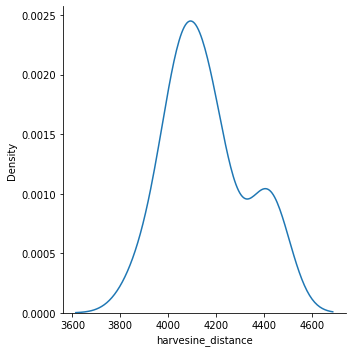

In [ ]:
sns.displot(power_plant_df['harvesine_distance'], kind = 'kde')

In [ ]:
power_plant_df['lat_long'] = list(zip(power_plant_df['latitude'],power_plant_df['longitude']))
power_plant_df

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,harvesine_distance,lat_long
0,Kenya,Garissa,WKS0062186,55.7,-0.3500,39.6050,Solar,NaN,4404.018730,"(-0.35, 39.605)"
1,Kenya,Gitaru,WRI1000039,225.0,-0.7967,37.7497,Hydro,1978.0,4198.370521,"(-0.7967, 37.7497)"
2,Kenya,Iberafrica I & II (Nairobi south diesel PP),WRI1061216,109.0,-1.2431,36.8905,Oil,NaN,4104.033773,"(-1.2431, 36.8905)"
3,Kenya,Kamburu,WRI1000040,94.2,-0.8093,37.6867,Hydro,1974.0,4191.392463,"(-0.8093, 37.6867)"
4,Kenya,Kiambere,WRI1000041,168.0,-0.6400,37.9100,Hydro,1987.0,4215.910012,"(-0.64, 37.91)"
5,Kenya,Kindaruma,WRI1000042,72.0,-0.8060,37.8110,Hydro,1968.0,4205.203650,"(-0.806, 37.811)"
6,Kenya,Kipevu I,WRI1000050,74.0,-4.0400,39.6380,Oil,2011.0,4426.620924,"(-4.04, 39.638)"
7,Kenya,Kipevu II (Tsavo),WRI1000051,74.5,-4.0379,39.6333,Oil,2001.0,4426.081696,"(-4.0379, 39.6333)"
8,Kenya,Kipevu III,WRI1000052,120.0,-4.0379,39.6333,Oil,1999.0,4426.081696,"(-4.0379, 39.6333)"
9,Kenya,Lake Turkana,WRI1000054,310.0,2.6447,36.7378,Wind,2017.0,4094.139777,"(2.6447, 36.7378)"


Creating bins 

In [ ]:
print(f"The minimum harvestine distance is {power_plant_df['harvesine_distance'].min():.2f} km and the maximum is {power_plant_df['harvesine_distance'].max():.2f} km in our gridded population dataset")


The minimum harvestine distance is 3875.54 km and the maximum is 4426.62 km in our gridded population dataset


In [ ]:
print(f"The range of harvesine distance in the gridded population data is {(power_plant_df['harvesine_distance'].max() - power_plant_df['harvesine_distance'].min()):.2f} km")


The range of harvesine distance in the gridded population data is 551.08 km


In [ ]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    

    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [ ]:
# Bin by 10km Harvestine distance
width = 5
no_bins = int(round((power_plant_df['harvesine_distance'].max() - power_plant_df['harvesine_distance'].min())/width, 0))
no_bins 

110

In [ ]:
import math
math.ceil(power_plant_df['harvesine_distance'].max()), math.floor(power_plant_df['harvesine_distance'].min())

(4427, 3875)

In [ ]:
lower_bound = math.floor(power_plant_df['harvesine_distance'].min())

In [ ]:
bins = create_bins(lower_bound=lower_bound,
                   width=width,
                   quantity=no_bins)

In [ ]:
harvestine_distance = power_plant_df['harvesine_distance']

In [ ]:
bins2 = pd.IntervalIndex.from_tuples(bins, closed="left")
categorical_object = pd.cut(harvestine_distance, bins2)


In [ ]:
power_plant_df['bins'] = pd.cut(power_plant_df['harvesine_distance'], bins = bins2)
power_plant_df

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,harvesine_distance,lat_long,bins
0,Kenya,Garissa,WKS0062186,55.7,-0.3500,39.6050,Solar,NaN,4404.018730,"(-0.35, 39.605)","[4400, 4405)"
1,Kenya,Gitaru,WRI1000039,225.0,-0.7967,37.7497,Hydro,1978.0,4198.370521,"(-0.7967, 37.7497)","[4195, 4200)"
2,Kenya,Iberafrica I & II (Nairobi south diesel PP),WRI1061216,109.0,-1.2431,36.8905,Oil,NaN,4104.033773,"(-1.2431, 36.8905)","[4100, 4105)"
3,Kenya,Kamburu,WRI1000040,94.2,-0.8093,37.6867,Hydro,1974.0,4191.392463,"(-0.8093, 37.6867)","[4190, 4195)"
4,Kenya,Kiambere,WRI1000041,168.0,-0.6400,37.9100,Hydro,1987.0,4215.910012,"(-0.64, 37.91)","[4215, 4220)"
5,Kenya,Kindaruma,WRI1000042,72.0,-0.8060,37.8110,Hydro,1968.0,4205.203650,"(-0.806, 37.811)","[4205, 4210)"
6,Kenya,Kipevu I,WRI1000050,74.0,-4.0400,39.6380,Oil,2011.0,4426.620924,"(-4.04, 39.638)","[4425, 4430)"
7,Kenya,Kipevu II (Tsavo),WRI1000051,74.5,-4.0379,39.6333,Oil,2001.0,4426.081696,"(-4.0379, 39.6333)","[4425, 4430)"
8,Kenya,Kipevu III,WRI1000052,120.0,-4.0379,39.6333,Oil,1999.0,4426.081696,"(-4.0379, 39.6333)","[4425, 4430)"
9,Kenya,Lake Turkana,WRI1000054,310.0,2.6447,36.7378,Wind,2017.0,4094.139777,"(2.6447, 36.7378)","[4090, 4095)"


In [ ]:
power_plant_df.longitude.max(), power_plant_df.longitude.min(), power_plant_df.latitude.max(), power_plant_df.latitude.min()

(39.638, 34.8521, 2.6447, -4.04)

In [ ]:
power_plant_df['harvesine_distance'].idxmax(), power_plant_df['harvesine_distance'].idxmin()

(6, 19)

In [ ]:
power_plant_df.iloc[power_plant_df['harvesine_distance'].idxmax()]

country_long                    Kenya
name                         Kipevu I
gppd_idnr                  WRI1000050
capacity_mw                      74.0
latitude                        -4.04
longitude                      39.638
primary_fuel                      Oil
commissioning_year             2011.0
harvesine_distance        4426.620924
lat_long              (-4.04, 39.638)
bins                     [4425, 4430)
Name: 6, dtype: object

In [ ]:
power_plant_df.iloc[power_plant_df['harvesine_distance'].idxmin()]

country_long                       Kenya
name                          Sondu Miru
gppd_idnr                     WRI1061222
capacity_mw                         60.0
latitude                         -0.3426
longitude                        34.8521
primary_fuel                       Hydro
commissioning_year                2007.0
harvesine_distance           3875.540256
lat_long              (-0.3426, 34.8521)
bins                        [3875, 3880)
Name: 19, dtype: object

In [ ]:
power_plant = power_plant_df[['capacity_mw','primary_fuel','commissioning_year' ,'bins']]
power_plant

,capacity_mw,primary_fuel,commissioning_year,bins
0,55.7,Solar,NaN,"[4400, 4405)"
1,225.0,Hydro,1978.0,"[4195, 4200)"
2,109.0,Oil,NaN,"[4100, 4105)"
3,94.2,Hydro,1974.0,"[4190, 4195)"
4,168.0,Hydro,1987.0,"[4215, 4220)"
5,72.0,Hydro,1968.0,"[4205, 4210)"
6,74.0,Oil,2011.0,"[4425, 4430)"
7,74.5,Oil,2001.0,"[4425, 4430)"
8,120.0,Oil,1999.0,"[4425, 4430)"
9,310.0,Wind,2017.0,"[4090, 4095)"


Cluster latitudes by 0.5 grid space & longitudes by 0.625 & sum the population - To match Level 3 data

In [ ]:
## Bin 
step_long = 0.625
to_bin_long = lambda x: np.floor(x / step_long) * step_long
power_plant_df["lonBin"] = to_bin_long(power_plant_df['longitude'])

step_lat = 0.5
to_bin_lat = lambda x: np.floor(x / step_lat) * step_lat
power_plant_df["latBin"] = to_bin_lat(power_plant_df['latitude'])

kenya_bins = power_plant_df.groupby(["latBin", "lonBin",'primary_fuel','commissioning_year']).sum().reset_index()
kenya_bins.drop(labels = ['latitude', 'longitude','harvesine_distance'], axis = 1, inplace = True)
kenya_bins.rename(columns = {'latBin' : 'latitude', 'lonBin' : 'longitude'}, inplace = True)
kenya_bins.head()



,latitude,longitude,primary_fuel,commissioning_year,capacity_mw
0,-4.5,39.375,Oil,1999.0,120.0
1,-4.5,39.375,Oil,2001.0,74.5
2,-4.5,39.375,Oil,2011.0,74.0
3,-4.0,39.375,Oil,2009.0,90.0
4,-1.5,36.250,Wind,1993.0,25.5


In [ ]:
a = pd.merge(XCO2_df, kenya_bins, how = 'outer', left_on= ['lat','lon'], right_on = ['latitude', 'longitude'])


for i in a[a['Year'] < a['commissioning_year']].index:
    a.at[i, 'primary_fuel' ] = np.NaN
    a.at[i, 'commissioning_year' ] = np.NaN
    a.at[i, 'capacity_mw' ] = np.NaN





# Population data

In [ ]:
import pandas as pd
import plotly.express as px
import georasters as gr
import os
import numpy as np
import georasters as gr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [ ]:
files = os.listdir('/content/drive/MyDrive/Climate Data/Data/Pop_data')
a = pd.DataFrame()
for file in files:
    path = f'/content/drive/MyDrive/Climate Data/Data/Pop_data/{file}'
    print(path)
    kenya_pop = gr.from_file(path)
    kenya_pop = kenya_pop.to_pandas()
    kenya_pop = kenya_pop.loc[:, ['value', 'x', 'y']]
    kenya_pop = kenya_pop.rename(columns = {'value' : 'population', 'x' : 'longitude', 'y': 'latitude'})
    
    ## Bin 
    step_long = 0.625
    to_bin_long = lambda x: np.floor(x / step_long) * step_long
    kenya_pop["lonBin"] = to_bin_long(kenya_pop.longitude)

    step_lat = 0.5
    to_bin_lat = lambda x: np.floor(x / step_lat) * step_lat
    kenya_pop["latBin"] = to_bin_lat(kenya_pop.latitude)

    kenya_population = kenya_pop.groupby(["latBin", "lonBin"]).sum().reset_index()
    kenya_population.drop(labels = ['latitude', 'longitude'], axis = 1, inplace = True)
    kenya_population.rename(columns = {'latBin' : 'latitude', 'lonBin' : 'longitude'}, inplace = True)
    year = file[8:12]
    kenya_population['year'] = year
    a = pd.concat([a, kenya_population])




/content/drive/MyDrive/Climate Data/Data/Pop_data/ken_ppp_2015_1km_Aggregated.tif
/content/drive/MyDrive/Climate Data/Data/Pop_data/ken_ppp_2016_1km_Aggregated.tif
/content/drive/MyDrive/Climate Data/Data/Pop_data/ken_ppp_2017_1km_Aggregated.tif
/content/drive/MyDrive/Climate Data/Data/Pop_data/ken_ppp_2018_1km_Aggregated.tif
/content/drive/MyDrive/Climate Data/Data/Pop_data/ken_ppp_2019_1km_Aggregated.tif
/content/drive/MyDrive/Climate Data/Data/Pop_data/ken_ppp_2020_1km_Aggregated.tif


In [ ]:
a.to_csv('population data.csv', index=False)

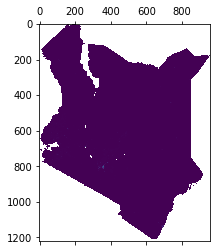

In [ ]:
kenya_pop = gr.from_file('/content/drive/MyDrive/Climate Data/Data/Pop_data/ken_ppp_2016_1km_Aggregated.tif')
kenya_pop.plot()

In [ ]:
kenya_pop = kenya_pop.to_pandas()

In [ ]:
kenya_pop.head()


In [ ]:
kenya_pop = kenya_pop.loc[:, ['value', 'x', 'y']]
kenya_pop = kenya_pop.rename(columns = {'value' : 'population', 'x' : 'longitude', 'y': 'latitude'})
kenya_pop

,population,longitude,latitude
0,18.059671,35.240417,5.466250
1,15.266613,35.248750,5.466250
2,13.826624,35.257083,5.466250
3,14.085008,35.265417,5.466250
4,13.171684,35.273750,5.466250
...,...,...,...
680257,20.917143,39.398750,-4.700416
680258,52.900757,39.407083,-4.700416
680259,0.000000,39.365417,-4.708750
680260,16.304119,39.373750,-4.708750


In [ ]:
kenya_pop['population'].sum()

In [ ]:
## Bin 
step_long = 0.625
to_bin_long = lambda x: np.floor(x / step_long) * step_long
kenya_pop["lonBin"] = to_bin_long(kenya_pop.longitude)

step_lat = 0.5
to_bin_lat = lambda x: np.floor(x / step_lat) * step_lat
kenya_pop["latBin"] = to_bin_lat(kenya_pop.latitude)

kenya_population = kenya_pop.groupby(["latBin", "lonBin"]).sum().reset_index()
kenya_population.drop(labels = ['latitude', 'longitude'], axis = 1, inplace = True)
kenya_population.rename(columns = {'latBin' : 'latitude', 'lonBin' : 'longitude'}, inplace = True)
kenya_population

,latitude,longitude,population
0,-5.0,38.750,7.415137e+04
1,-5.0,39.375,1.897154e+04
2,-4.5,38.125,2.785090e+03
3,-4.5,38.750,2.328479e+05
4,-4.5,39.375,1.222490e+06
...,...,...,...
185,4.5,35.000,3.101911e+04
186,4.5,35.625,1.739804e+04
187,5.0,34.375,1.015589e+03
188,5.0,35.000,9.234253e+03


# City Data 

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import georasters as gr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [ ]:
kenya_city = pd.read_csv('/content/drive/MyDrive/Climate Data/Data/City data/worldcities.csv')


In [ ]:
kenya_city = kenya_city.loc[:, ['city_ascii','lat', 'lng', 'capital', 'population']]
kenya_city = kenya_city.rename(columns = {'population': 'city_pop_2022',
                                          'lat' : 'latitude', 
                                          'lng': 'longitude'})
kenya_city

,city_ascii,latitude,longitude,capital,city_pop_2022
0,Nairobi,-1.2864,36.8172,primary,5545000.0
1,Meru,0.0500,37.6500,admin,1833000.0
2,Mombasa,-4.0500,39.6667,admin,1200000.0
3,Kisumu,-0.1000,34.7500,admin,409928.0
4,Nakuru,-0.2833,36.0667,admin,307990.0
...,...,...,...,...,...
58,Dadaab,0.0531,40.3086,NaN,5723.0
59,Karungu,-0.8496,34.1500,NaN,2376.0
60,Witu,-2.3796,40.4300,NaN,5380.0
61,Konza,-1.7496,37.1200,NaN,2004.0


In [ ]:
## Bin 
step_long = 0.625
to_bin_long = lambda x: np.floor(x / step_long) * step_long
kenya_city["lonBin"] = to_bin_long(kenya_city.longitude)

step_lat = 0.5
to_bin_lat = lambda x: np.floor(x / step_lat) * step_lat
kenya_city["latBin"] = to_bin_lat(kenya_city.latitude)

kenya_city.drop(labels = ['latitude', 'longitude'], axis = 1, inplace = True)
kenya_city.rename(columns = {'latBin' : 'latitude', 'lonBin' : 'longitude'}, inplace = True)


In [ ]:
kenya_city.to_csv('kenya_city_pop.csv', index = False)

# Fire 


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os
%matplotlib inline

In [ ]:
files = os.listdir('/content/drive/MyDrive/Climate Data/Data/Fire Data')


In [ ]:
files[0]

'modis_2015_Kenya.csv'

In [ ]:
path = f'/content/drive/MyDrive/Climate Data/Data/Fire Data/{files[0]}'
pd.read_csv(path)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,2.9102,36.1589,325.2,3.0,1.7,2015-01-01,735,Terra,MODIS,57,6.2,308.4,28.9,D,0
1,3.8971,34.1101,322.4,1.0,1.0,2015-01-02,817,Terra,MODIS,46,6.2,311.7,9.7,D,0
2,1.0708,35.2130,317.5,1.1,1.1,2015-01-02,818,Terra,MODIS,61,6.2,303.7,9.1,D,0
3,1.0614,34.5275,342.7,1.1,1.0,2015-01-02,818,Terra,MODIS,91,6.2,302.8,44.5,D,0
4,1.0601,34.5369,328.0,1.1,1.0,2015-01-02,818,Terra,MODIS,79,6.2,304.4,20.7,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,-0.1464,35.1521,338.1,1.1,1.1,2015-12-31,800,Terra,MODIS,88,6.2,300.7,41.5,D,0
3876,0.9838,34.7788,315.9,1.2,1.1,2015-12-31,800,Terra,MODIS,41,6.2,301.8,9.7,D,0
3877,0.5741,34.8589,318.6,1.2,1.1,2015-12-31,800,Terra,MODIS,65,6.2,303.4,10.2,D,0
3878,-0.1480,35.1622,316.1,1.1,1.1,2015-12-31,800,Terra,MODIS,64,6.2,300.3,9.4,D,0


In [ ]:
a = pd.DataFrame()
for file in files:
    path = f'/content/drive/MyDrive/Climate Data/Data/Fire Data/{file}'
    print(path)
    kenya_fire = pd.read_csv(path)
    
    ## Bin 
    step_long = 0.625
    to_bin_long = lambda x: np.floor(x / step_long) * step_long
    kenya_fire["lonBin"] = to_bin_long(kenya_fire.longitude)

    step_lat = 0.5
    to_bin_lat = lambda x: np.floor(x / step_lat) * step_lat
    kenya_fire["latBin"] = to_bin_lat(kenya_fire.latitude)
    
    kenya_fire['acq_date'] = pd.to_datetime(kenya_fire['acq_date'])
    kenya_fire['year'] = kenya_fire['acq_date'].dt.year
    kenya_fire['month'] = kenya_fire['acq_date'].dt.month
    

    kenya_fire.drop(columns= ['latitude', 'longitude','acq_time','satellite','instrument','confidence','version','type', 'daynight'], inplace = True)

    kenya_fire_data = kenya_fire.groupby(["latBin", "lonBin",'year','month']).mean().round(2).reset_index()
    kenya_fire_data.rename(columns = {'latBin' : 'latitude', 'lonBin' : 'longitude'}, inplace = True)

    a = pd.concat([a, kenya_fire_data])



/content/drive/MyDrive/Climate Data/Data/Fire Data/modis_2015_Kenya.csv
/content/drive/MyDrive/Climate Data/Data/Fire Data/modis_2016_Kenya.csv
/content/drive/MyDrive/Climate Data/Data/Fire Data/modis_2017_Kenya.csv
/content/drive/MyDrive/Climate Data/Data/Fire Data/modis_2018_Kenya.csv
/content/drive/MyDrive/Climate Data/Data/Fire Data/modis_2019_Kenya.csv
/content/drive/MyDrive/Climate Data/Data/Fire Data/modis_2020_Kenya.csv
/content/drive/MyDrive/Climate Data/Data/Fire Data/modis_2021_Kenya.csv


In [ ]:
a.to_csv('kenya_fire.csv', index = False)

# Cement + Oil refineries + Extra

In [ ]:
kenya_cement = pd.read_excel('/content/drive/MyDrive/Climate Data/Data/Cement + extra/SFI-Global-Cement-Database-July-2021.xlsx')
kenya_cement.columns

Index(['city', 'state', 'latitude', 'longitude', 'accuracy', 'plant_type',
       'capacity'],
      dtype='object')

In [ ]:

## Bin 
step_long = 0.625
to_bin_long = lambda x: np.floor(x / step_long) * step_long
kenya_cement["lonBin"] = to_bin_long(kenya_cement.longitude)

step_lat = 0.5
to_bin_lat = lambda x: np.floor(x / step_lat) * step_lat
kenya_cement["latBin"] = to_bin_lat(kenya_cement.latitude)

kenya_cement.columns

kenya_cement.drop(columns= ['latitude', 'longitude','accuracy','capacity'], inplace = True)

kenya_cement.rename(columns = {'latBin' : 'latitude', 'lonBin' : 'longitude'}, inplace = True)

kenya_cement.to_csv('kenya_cemet.csv',index = False)



# Combining all data

In [ ]:
final_data = pd.read_csv('/content/drive/MyDrive/OCO2 data/final data.csv')
final_data

,lat,lon,XCO2 (mol CO2/mol dry),XCO2PREC (mol CO2/mol dry),Month,Year,DATE,population,primary_fuel,commissioning_year,capacity_mw,city_ascii,capital,city_pop_2022,month,brightness,scan,track,bright_t31,frp
0,-5.0,38.750,0.000414,5.421756e-08,2,2021,2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,334.72,1.44,1.12,306.50,23.90
1,-5.0,38.750,0.000414,3.570844e-08,3,2021,2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,330.70,1.15,1.05,306.35,14.65
2,-5.0,38.750,0.000404,5.427318e-08,3,2017,2017-03-01,76316.340,NaN,NaN,NaN,NaN,NaN,NaN,3,326.80,1.00,1.00,304.70,13.90
3,-5.0,38.750,0.000398,2.360435e-08,1,2015,2015-01-01,71487.750,NaN,NaN,NaN,NaN,NaN,NaN,1,325.20,1.10,1.00,304.00,10.10
4,-5.0,38.750,0.000399,1.796053e-08,3,2015,2015-03-01,71487.750,NaN,NaN,NaN,NaN,NaN,NaN,3,329.43,2.04,1.36,301.93,33.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,4.5,35.000,0.000407,4.341377e-08,11,2018,2018-11-01,33335.830,NaN,NaN,NaN,NaN,NaN,NaN,11,330.78,1.36,1.14,303.52,32.38
4227,4.5,35.625,0.000415,5.676942e-08,5,2021,2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,306.20,2.10,1.40,272.70,10.10
4228,4.5,35.625,0.000414,4.844761e-08,1,2021,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,340.45,1.60,1.20,314.00,47.65
4229,4.5,35.625,0.000401,4.263339e-08,12,2015,2015-12-01,16838.428,NaN,NaN,NaN,NaN,NaN,NaN,12,312.90,4.00,1.90,289.50,57.50


In [ ]:
kenya_cement


,city,state,plant_type,longitude,latitude
0,Kaloleni,Kilifi County,Cement,39.375,-4.0
1,Athi River,Machakos County,Cement,36.875,-1.5
2,Athi River,Machakos County,Cement,36.875,-1.5
3,Athi River,Machakos County,Cement,36.875,-1.5
4,Mombasa,Mombasa County,Cement,39.375,-4.5
5,Athi River,Machakos County,Cement,36.875,-1.5
6,Mkomani,Kilifi County,Cement,39.375,-4.0
7,Athi River,Machakos County,Cement,36.875,-1.5
8,Athi River,Machakos County,Cement,36.875,-1.5
9,Athi River,Machakos County,Cement,36.875,-1.5


In [ ]:
final_data = pd.merge(final_data, kenya_cement, how='outer',  left_on=['lat', 'lon'], right_on=['latitude', 'longitude'])


In [ ]:
final_data.to_csv('final_data.csv', index = True)